In [2]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


In [3]:
train = pd.read_csv('emails.csv')

In [4]:
train.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [5]:
len(train['spam'])

5728

In [6]:
len(train[train['spam'] == 1])

1368

In [7]:
stopword = ("i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do", "does", "did", "doing", "would", "should", "could", "ought", "i'm", "you're", "he's", "she's", "it's", "we're", "they're", "i've", "you've", "we've", "they've", "i'd", "you'd", "he'd", "she'd", "we'd", "they'd", "i'll", "you'll", "he'll", "she'll", "we'll", "they'll", "isn't", "aren't", "wasn't", "weren't", "hasn't", "haven't", "hadn't", "doesn't", "don't", "didn't", "won't", "wouldn't", "shan't", "shouldn't", "can't", "cannot", "couldn't", "mustn't", "let's", "that's", "who's", "what's", "here's", "there's", "when's", "where's", "why's", "how's", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before", "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than", "too", "very")

In [8]:
# Which word appears at the beginning of every email in the dataset? Respond as a lower-case word with punctuation removed.
VB = CountVectorizer(stop_words= 'english').fit(train['text'])
x_train_counts = VB.transform(train['text'])
x_train_counts.shape

(5728, 36996)

In [9]:
# most frequency words in the training set
print(list(VB.vocabulary_)[0])

subject


In [10]:
len(VB.vocabulary_)

36996

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_train_counts, train['spam'], test_size=0.3, random_state=0)


In [12]:
CART = DecisionTreeClassifier().fit(X_train, y_train)
RANDOMTREE = RandomForestClassifier().fit(X_train, y_train)

In [13]:
print(CART.score(X_test, y_test))
print(RANDOMTREE.score(X_test, y_test))

0.954043048283886
0.9773123909249564


Text(0.5, 0, 'Random Tree Feature Importance')

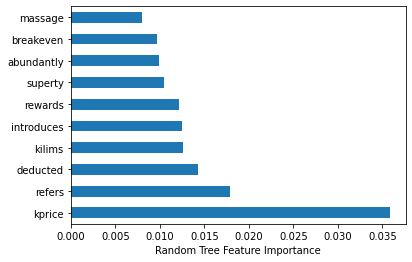

In [14]:
#plot importance of features
feat_importances = pd.Series(RANDOMTREE.feature_importances_, index=VB.vocabulary_).sort_values(ascending=False)
feat_importances.nlargest(10).plot(kind='barh').set_xlabel('Random Tree Feature Importance')


Text(0.5, 0, 'CART Feature Importance')

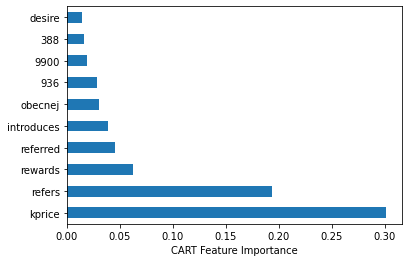

In [15]:
feat_importances = pd.Series(CART.feature_importances_, index=VB.vocabulary_).sort_values(ascending=False)
feat_importances.nlargest(10).plot(kind='barh').set_xlabel('CART Feature Importance')